In [1]:
!pip install labelme tensorflow==2.10 tensorflow-gpu==2.10 opencv-python matplotlib albumentations

  Using cached labelme-5.5.0-py3-none-any.whl
  Using cached tensorflow-2.10.0-cp39-cp39-win_amd64.whl (455.9 MB)
  Using cached tensorflow_gpu-2.10.0-cp39-cp39-win_amd64.whl (455.9 MB)
  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
  Using cached matplotlib-3.9.1-cp39-cp39-win_amd64.whl (8.0 MB)
  Using cached albumentations-1.4.11-py3-none-any.whl (165 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl (26.4 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl (26 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached numpy-2.0.0-cp39-cp39-win_amd64.whl (16.5 MB)
  Using cached termcolor-2.4.0-py3-none-any.whl (7.7 kB)
  Using cached protobuf-3.19.6-cp39-cp39-win_

You should consider upgrading via the 'C:\Users\dell\Desktop\Facial-Recognition\env\Scripts\python39.exe -m pip install --upgrade pip' command.


In [1]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
albucore                     0.0.12
albumentations               1.4.11
annotated-types              0.7.0
asttokens                    2.4.1
astunparse                   1.6.3
beautifulsoup4               4.12.3
cachetools                   5.3.3
certifi                      2024.7.4
charset-normalizer           3.3.2
colorama                     0.4.6
coloredlogs                  15.0.1
comm                         0.2.2
contourpy                    1.2.1
cycler                       0.12.1
debugpy                      1.8.2
decorator                    5.1.1
eval_type_backport           0.2.0
exceptiongroup               1.2.1
executing                    2.0.1
filelock                     3.15.4
flatbuffers                  24.3.25
fonttools                    4.53.1
gast                         0.4.0
gdown                        5.2.0
google-auth                  2.32.0

You should consider upgrading via the 'C:\Users\dell\Desktop\Facial-Recognition\env\Scripts\python39.exe -m pip install --upgrade pip' command.


In [1]:
import os
import time
import uuid
import cv2

In [3]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [7]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [2]:
!labelme

2024-07-12 15:07:45,876 [INFO   ] __init__:get_config:67- Loading config file from: C:\Users\dell\.labelmerc


In [2]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [ ]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')

In [5]:
images.as_numpy_iterator().next()

b'data\\images\\4b015f37-4030-11ef-a323-010101010000.jpg'

In [4]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [ ]:
images = images.map(load_image)

In [8]:
images.as_numpy_iterator().next()

array([[[110, 102,  99],
        [109, 104, 101],
        [111, 107, 106],
        ...,
        [145, 143, 144],
        [143, 141, 142],
        [143, 141, 142]],

       [[119, 111, 109],
        [114, 109, 106],
        [112, 108, 109],
        ...,
        [144, 142, 143],
        [143, 141, 142],
        [143, 141, 142]],

       [[120, 114, 114],
        [114, 110, 109],
        [109, 107, 108],
        ...,
        [143, 143, 145],
        [142, 142, 142],
        [143, 143, 143]],

       ...,

       [[109, 145, 177],
        [103, 139, 171],
        [110, 143, 178],
        ...,
        [125,  94,  50],
        [113,  80,  37],
        [122,  91,  47]],

       [[104, 143, 174],
        [100, 139, 170],
        [107, 142, 174],
        ...,
        [134, 101,  56],
        [117,  83,  37],
        [121,  89,  42]],

       [[ 97, 138, 168],
        [108, 147, 178],
        [120, 155, 187],
        ...,
        [142, 108,  62],
        [119,  85,  37],
        [119,  85,  37]]

In [9]:
type(images)

tensorflow.python.data.ops.dataset_ops.MapDataset

In [10]:
image_generator = images.batch(4).as_numpy_iterator()

In [15]:
plot_images = image_generator.next()

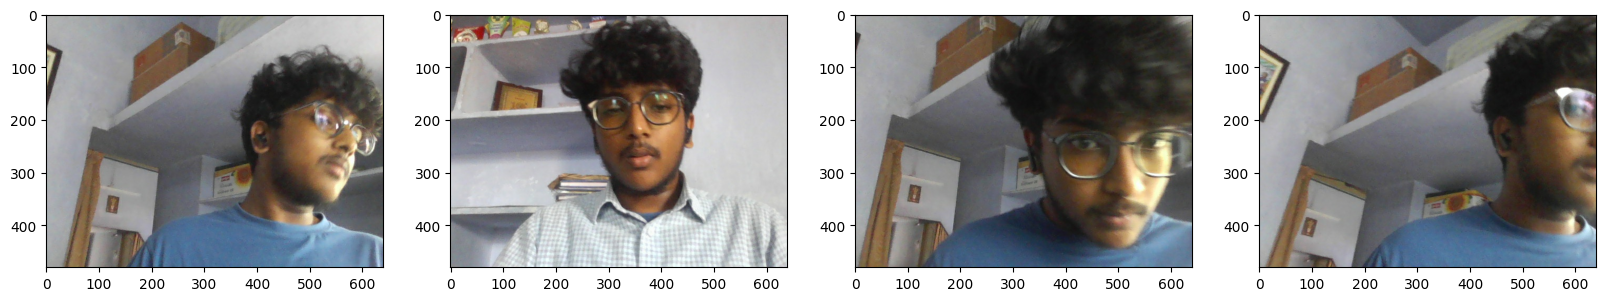

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

In [17]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)   

In [4]:
import albumentations as alb

In [5]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [6]:
img = cv2.imread(os.path.join('data','train', 'images','003034e9-4030-11ef-bceb-010101010000.jpg'))

In [7]:
with open(os.path.join('data', 'train', 'labels', '003034e9-4030-11ef-bceb-010101010000.json'), 'r') as f:
    label = json.load(f)

In [8]:
label['shapes'][0]['points']

[[167.13541666666669, 43.12499999999998], [514.53125, 405.10416666666663]]

In [9]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [10]:

coords

[167.13541666666669, 43.12499999999998, 514.53125, 405.10416666666663]

In [11]:
coords = list(np.divide(coords, [640,480,640,480]))

In [12]:
coords

[0.2611490885416667, 0.08984374999999996, 0.803955078125, 0.8439670138888888]

In [13]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [14]:
augmented['bboxes'][0][2:]

(0.8330324074074074, 0.8802314814814814)

In [15]:
augmented['bboxes']

[(0.06104166666666666,
  0.07583333333333328,
  0.8330324074074074,
  0.8802314814814814)]

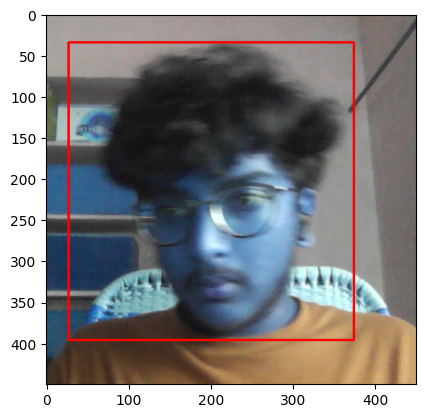

In [16]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [21]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

In [7]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [8]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [9]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [10]:
train_images.as_numpy_iterator().next()

array([[[0.49258578, 0.5072917 , 0.52542895],
        [0.48737746, 0.51139706, 0.52316177],
        [0.48039216, 0.50441176, 0.51617646],
        ...,
        [0.6617647 , 0.69264704, 0.6901961 ],
        [0.6761642 , 0.68155634, 0.69577205],
        [0.6805147 , 0.6784314 , 0.6985907 ]],

       [[0.4811887 , 0.5204044 , 0.5257966 ],
        [0.48578432, 0.52095586, 0.5425858 ],
        [0.48431373, 0.5117647 , 0.5441176 ],
        ...,
        [0.6628064 , 0.68535537, 0.6780025 ],
        [0.6730392 , 0.6784314 , 0.6848039 ],
        [0.67224264, 0.68351716, 0.6918505 ]],

       [[0.48707107, 0.51844364, 0.52775735],
        [0.49460784, 0.51029414, 0.54656863],
        [0.49846813, 0.50643384, 0.5539216 ],
        ...,
        [0.6628064 , 0.67849267, 0.6745711 ],
        [0.6696078 , 0.675     , 0.6813725 ],
        [0.67677695, 0.6806985 , 0.69148284]],

       ...,

       [[0.4246936 , 0.56286764, 0.719424  ],
        [0.46819854, 0.61905634, 0.7632353 ],
        [0.50667894, 0

In [12]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [13]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [14]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [15]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [16]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.0425, 0.0914, 0.8145, 0.896 ], dtype=float16))

In [17]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3780, 3780, 840, 840, 780, 780)

In [18]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [19]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [20]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [21]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.002384, 0.0915  , 0.8984  , 0.8506  ],
        [0.      , 0.2053  , 0.615   , 0.909   ],
        [0.2544  , 0.1708  , 0.9453  , 0.9033  ],
        [0.008545, 0.09204 , 0.775   , 0.8604  ],
        [0.1223  , 0.236   , 0.7876  , 0.8784  ],
        [0.      , 0.05478 , 0.315   , 0.72    ],
        [0.2455  , 0.09314 , 1.      , 0.982   ],
        [0.2532  , 0.2876  , 1.      , 0.9937  ]], dtype=float16))

In [22]:
data_samples = train.as_numpy_iterator()

In [33]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


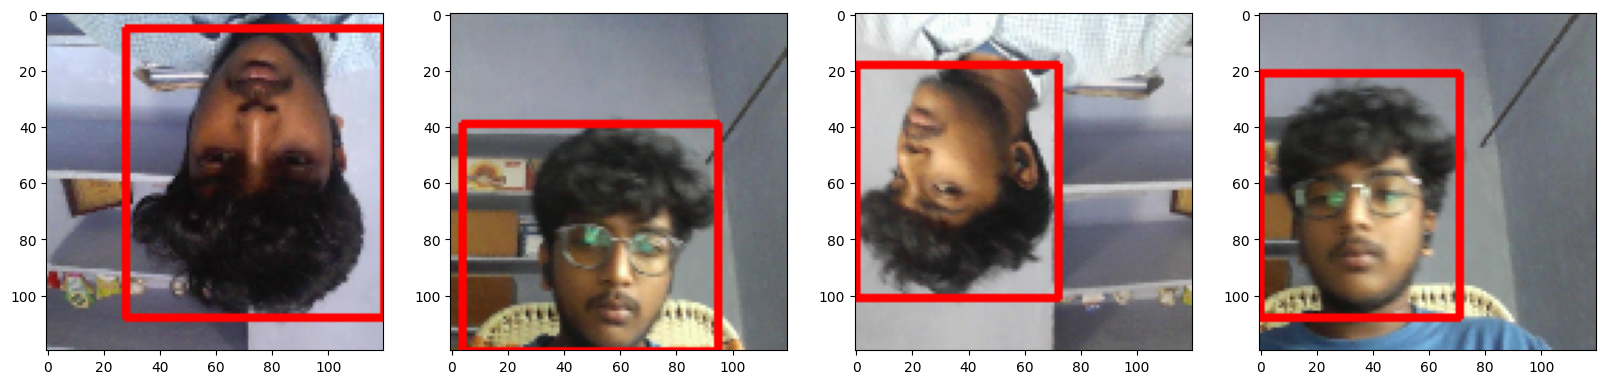

In [34]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx].copy()
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [35]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [36]:
vgg = VGG16(include_top=False)

58889256/58889256 [==============================] - 20s 0us/step


In [37]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [38]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [39]:
facetracker = build_model()

In [40]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [41]:
X, y = train.as_numpy_iterator().next()

In [42]:
X.shape

(8, 120, 120, 3)

In [43]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 1s 1s/step


In [44]:
classes, coords

(array([[0.60226285],
        [0.48509058],
        [0.44913352],
        [0.6141606 ],
        [0.5121294 ],
        [0.52500665],
        [0.5673622 ],
        [0.6054668 ]], dtype=float32),
 array([[0.4603165 , 0.51522577, 0.40319827, 0.5847799 ],
        [0.38607082, 0.519687  , 0.5944454 , 0.52525055],
        [0.33128068, 0.51231515, 0.5448245 , 0.572896  ],
        [0.3917587 , 0.5903904 , 0.52560854, 0.54568785],
        [0.36885616, 0.56155986, 0.40373895, 0.52750283],
        [0.43192908, 0.56872874, 0.44450134, 0.5762954 ],
        [0.36845142, 0.5442982 , 0.5109083 , 0.5958535 ],
        [0.3800317 , 0.62346107, 0.48009115, 0.5903209 ]], dtype=float32))

In [45]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [46]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

In [47]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [48]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [49]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=8.332403>

In [50]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.7241975>

In [51]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=8.332403>

In [52]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [53]:
model = FaceTracker(facetracker)

In [54]:
model.compile(opt, classloss, regressloss)

In [55]:
logdir='logs'

In [56]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [57]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
473/473 [==============================] - 1126s 2s/step - total_loss: 0.3587 - class_loss: 0.0474 - regress_loss: 0.3350 - val_total_loss: 0.0228 - val_class_loss: 0.0012 - val_regress_loss: 0.0222
Epoch 2/10
473/473 [==============================] - 1064s 2s/step - total_loss: 0.0484 - class_loss: 0.0046 - regress_loss: 0.0461 - val_total_loss: 0.0075 - val_class_loss: 3.0824e-04 - val_regress_loss: 0.0073
Epoch 3/10
473/473 [==============================] - 1083s 2s/step - total_loss: 0.0264 - class_loss: 0.0014 - regress_loss: 0.0257 - val_total_loss: 0.0166 - val_class_loss: 7.3314e-06 - val_regress_loss: 0.0166
Epoch 4/10
473/473 [==============================] - 842s 2s/step - total_loss: 0.0229 - class_loss: 0.0032 - regress_loss: 0.0213 - val_total_loss: 0.0325 - val_class_loss: 4.0880e-04 - val_regress_loss: 0.0323
Epoch 5/10
473/473 [==============================] - 1000s 2s/step - total_loss: 0.0192 - class_loss: 0.0012 - regress_loss: 0.0186 - val_total_loss

In [72]:
hist.history

{'total_loss': [0.15154427289962769,
  0.006020854692906141,
  0.0019001547480002046,
  0.005610120948404074,
  0.004279453307390213,
  0.002407110994681716,
  0.004603330511599779,
  0.004723174963146448,
  0.0022134161554276943,
  0.012857073917984962],
 'class_loss': [0.06362303346395493,
  4.99191719427472e-06,
  1.6630154277663678e-05,
  4.4065916881663725e-05,
  0.00027729952125810087,
  2.0861664324911544e-06,
  2.536277679610066e-05,
  4.0130020352080464e-05,
  2.9132470444892533e-05,
  3.486886726022931e-06],
 'regress_loss': [0.11973275244235992,
  0.006018358748406172,
  0.001891839667223394,
  0.005588088184595108,
  0.004140803590416908,
  0.0024060679133981466,
  0.0045906491577625275,
  0.004703110083937645,
  0.002198849804699421,
  0.012855330482125282],
 'val_total_loss': [0.022767260670661926,
  0.00745944119989872,
  0.01659662462770939,
  0.03250252828001976,
  0.02172323688864708,
  0.008825051598250866,
  0.011485987342894077,
  0.0031966848764568567,
  0.0180323

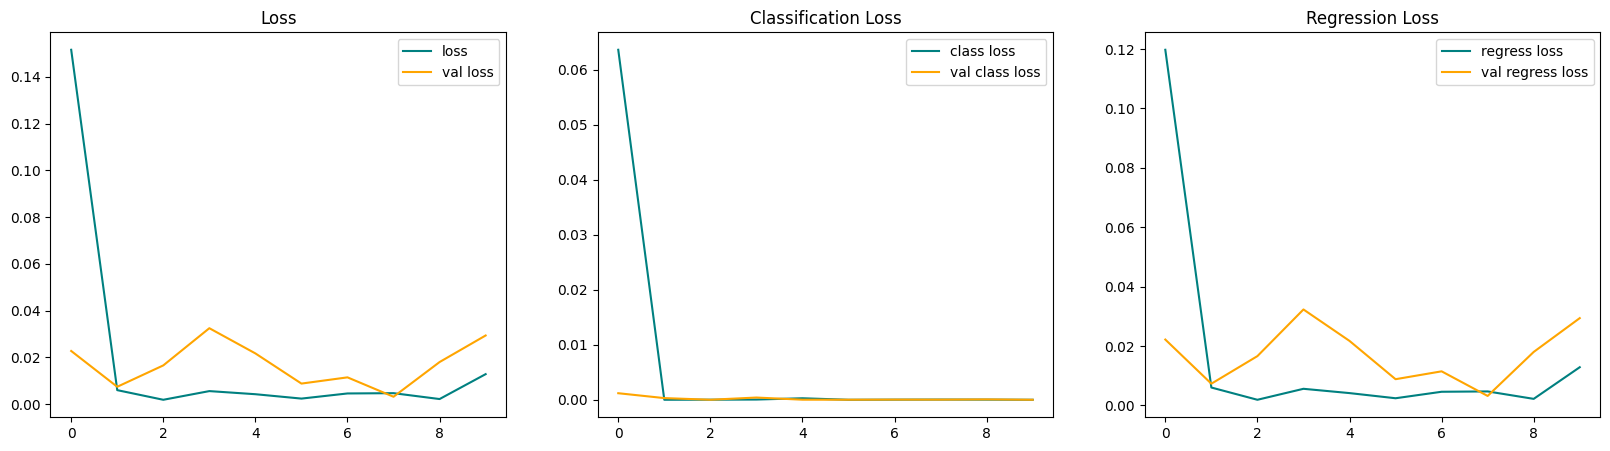

In [73]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [74]:
test_data = test.as_numpy_iterator()

In [75]:
test_sample = test_data.next()

In [76]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 1s 1s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


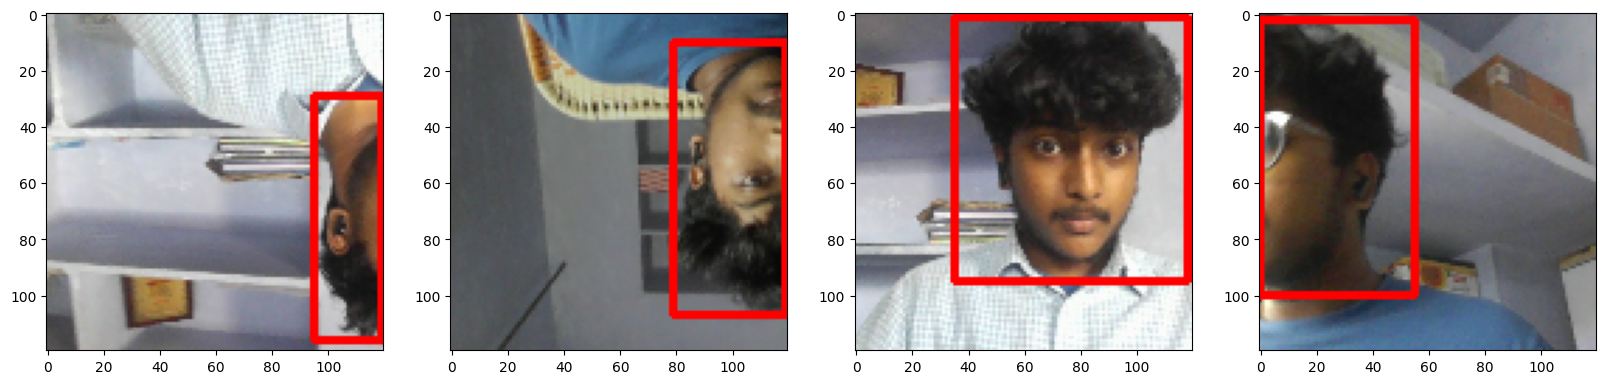

In [77]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx].copy()
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [78]:
from tensorflow.keras.models import load_model

In [79]:
facetracker.save('facetracker.h5')

In [80]:
facetracker = load_model('facetracker.h5')

In [81]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 171ms/step
